In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    "font.sans-serif": "Computer Modern Sans serif",
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.special import gamma
from matplotlib.ticker import AutoMinorLocator

In [4]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
def calc_chi2(data, fit, err, dof):
    chi2 = np.sum(np.square(data-fit)/np.square(err))
    return chi2, chi2/dof

def chi2probdistribution(chi2, dof):
    if chi2 > 0:
        num = np.power(chi2,(dof-2.0)/2.0)*np.exp(-chi2/2.0)
        dem = np.power(2.0,(dof/2.0))*gamma(dof/2.0)
        return num/dem
    elif chi2 == 0:
        return 0
    else:
        print('Chi^2 values < 0 not valid!')
                   
def calc_chi2prob(chi2, dof):
    return quad(chi2probdistribution, chi2, np.inf, (dof))

In [6]:
unreg_data = pd.read_csv('data/trans_al_unregressed.csv', index_col=0)
reg_data = pd.read_csv('data/trans_al_regressed.csv', index_col=0)

In [7]:
unreg_data.head()

,r1_v_avg,r1_v_err,r2_h_avg,r2_h_err,r2_v_avg,r2_v_err
0,-9.002047,1.195183,-1.153025,1.005392,-7.483198,1.464045
1,-3.613179,1.216529,-5.126757,1.006610,-5.063603,1.465977
2,0.231989,1.222184,-9.810435,1.006470,0.705789,1.464384
3,7.358702,1.235699,-4.806368,1.022078,4.411487,1.485367
4,11.105761,1.218335,-0.208437,1.027497,7.617870,1.493204


In [8]:
md_num = np.arange(1,9,1)

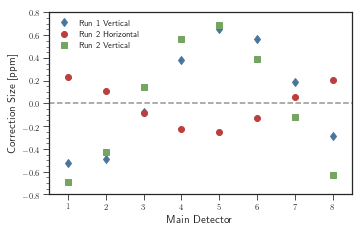

In [15]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.plot(md_num, (reg_data.r1_v_avg-unreg_data.r1_v_avg), ls='None', marker='d', color=sns.xkcd_rgb['dull blue'], label='Run 1 Vertical')
ax.plot(md_num, (reg_data.r2_h_avg-unreg_data.r2_h_avg), ls='None', marker='o', color=sns.xkcd_rgb['dull red'], label='Run 2 Horizontal')
ax.plot(md_num, (reg_data.r2_v_avg-unreg_data.r2_v_avg), ls='None', marker='s', color=sns.xkcd_rgb['dull green'], label='Run 2 Vertical')
ax.plot([0.5, 8.5], [0.0, 0.0], ls='--', color=sns.xkcd_rgb['grey'])
ax.set_xlim(0.5, 8.5)
ax.set_ylim(-0.8, 0.8)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_xlabel('Main Detector')
ax.set_ylabel('Correction Size [ppm]')
ax.legend(loc='best')
plt.savefig('plots/trans_al_regression_correction_sizes.png', bbox_inches='tight')
plt.savefig('plots/trans_al_regression_correction_sizes.pgf', bbox_inches='tight')
plt.savefig('plots/trans_al_regression_correction_sizes.pdf', bbox_inches='tight')
plt.show()